# imports

In [1]:
import pandas as pd
import numpy as np

# models
import xgboost as xgb

# data split
from sklearn.model_selection import train_test_split

# sklearn metrics
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, recall_score


In [2]:
df = pd.read_csv('modeling_feats.csv',index_col= 0 )

In [4]:
df.columns.tolist()

['zip',
 'term',
 'no_emp',
 'new_exist',
 'create_job',
 'retained_job',
 'franchise_code',
 'urban_rural',
 'rev_line_cr',
 'low_doc',
 'disbursement_gross',
 'balance_gross',
 'chg_off_prin_gr',
 'gr_appv',
 's_b_a__appv',
 'sec_points',
 'state_score',
 'target']

# X and y split

In [3]:
# features
X = df.drop(columns= ['target','retained_job','chg_off_prin_gr'])
# Select dependent variable
y = df['target']

In [73]:
# checking X 
X.head(1)

,zip,term,no_emp,new_exist,create_job,franchise_code,urban_rural,rev_line_cr,low_doc,disbursement_gross,balance_gross,gr_appv,s_b_a__appv,sec_points,state_score
0,47711,84,4,2,0,1,0,0,1,60000,0,60000,48000,45,3


In [5]:
# checking y
y

0         0
1         0
2         0
3         0
4         0
         ..
899158    0
899160    0
899161    0
899162    1
899163    0
Name: target, Length: 611155, dtype: int64

# split the data

In [6]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
# different imports i might try
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score, make_scorer, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


# scaling

In [8]:
X_train

,zip,term,no_emp,new_exist,create_job,franchise_code,urban_rural,rev_line_cr,low_doc,disbursement_gross,balance_gross,gr_appv,s_b_a__appv,sec_points,state_score
505808,97501,84,2,2,2,0,1,0,0,17600,0,17600,14960,72,3
624684,17921,60,1,1,0,0,1,0,0,85000,0,85000,42500,81,3
98252,34677,39,10,2,0,1,0,1,0,125355,0,100000,50000,54,4
476337,44113,60,0,1,0,0,1,0,0,16500,0,16500,8250,44,3
766049,84770,120,2,2,0,1,0,0,1,34700,0,34700,31230,81,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136691,19382,52,1,1,1,0,1,1,0,50000,0,25000,12500,54,3
355878,30278,36,1,2,0,0,0,0,0,53000,0,53000,45050,81,4
504862,11735,84,9,2,2,0,1,0,0,609000,0,609000,304500,62,3
166540,90016,84,6,1,0,1,2,1,0,61469,0,30000,15000,42,3


In [9]:

from sklearn.preprocessing import StandardScaler
# creating a scaler instance
scaler = StandardScaler()

# fit and transforming to train
X_train_sc =scaler.fit_transform(X_train)

# transform to test
X_test_sc = scaler.transform(X_test)

In [10]:
# Creating dataframe from scaled data
X_train_sc = pd.DataFrame(X_train_sc)
X_test_sc = pd.DataFrame(X_test_sc)


# gridsearch

## random forest

In [11]:
# Create a random forest classifier
rfc = RandomForestClassifier()

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [5,7,10],
    'max_depth': [3,5],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 3]
}

# Create a grid search object
grid_search = GridSearchCV(
    estimator=rfc,
    # using the dictionary
    param_grid=param_grid,
    # cross validate
    cv = 2,
    n_jobs = 2,
    # stop after 3 iteration with no improvment
    verbose= 3,
    # metric
    scoring='accuracy'
)


# Fit the grid search to the data scaled data
grid_search.fit(X_train_sc, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Fitting 2 folds for each of 36 candidates, totalling 72 fits
Best parameters:  {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 7}
Best score:  0.8874569462738585


# XGBoost

In [12]:
# create an object instances
model = xgb.XGBClassifier()

# fit model X_train_scaled, and y train
xgb_model = model.fit(X_train_sc, y_train)

In [13]:
# creating prediction based on X_test_scaled
y_hat = xgb_model.predict(X_test_sc)
# show accuracy score
print(f'Model XGboost Accuracy: {accuracy_score(y_test, y_hat):.2f}')

Model XGboost Accuracy: 0.95


In [14]:
X_test_sc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.088417,-0.200507,-0.134717,1.636702,-0.031817,-0.182626,2.003555,-0.693283,-0.321062,-0.271522,-0.001705,-0.230993,-0.185139,0.631602,-2.606334
1,1.283232,2.579421,-0.080611,-0.601308,-0.038872,-0.182535,-1.061708,-0.693283,-0.321062,-0.187237,-0.001705,-0.143627,-0.062334,-1.415605,0.152711
2,1.247873,2.579421,-0.121190,-0.601308,-0.038872,-0.182535,-1.061708,-0.693283,-0.321062,0.342174,-0.001705,0.405131,0.410820,1.655205,0.152711
3,-0.251396,-0.571164,-0.121190,-0.601308,-0.038872,-0.182535,0.470923,-0.693283,-0.321062,-0.466602,-0.001705,-0.433202,-0.409653,1.314004,0.152711
4,-0.213429,0.196625,-0.161770,1.636702,-0.038872,7.012668,0.470923,-0.693283,-0.321062,0.042627,-0.001705,0.094638,0.060409,1.314004,0.152711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122226,-1.362396,-0.862395,-0.040032,-0.601308,-0.038872,-0.182535,0.470923,1.442413,-0.321062,-0.135708,-0.001705,-0.374984,-0.459509,0.934892,0.152711
122227,-0.504060,1.864582,0.108758,-0.601308,-0.038872,-0.182626,-1.061708,-0.693283,-0.321062,0.782433,-0.001705,0.861479,0.928644,-1.415605,0.152711
122228,-0.217390,-0.597640,0.244022,-0.601308,-0.038872,7.012668,0.470923,-0.693283,-0.321062,-0.241942,-0.001705,-0.200331,-0.210233,1.314004,0.152711
122229,-1.183637,-1.312479,0.014074,-0.601308,-0.038872,-0.182535,-1.061708,-0.693283,-0.321062,-0.642406,-0.001705,-0.615430,-0.591098,0.176667,0.152711


# model information

In [18]:
xgb_model.feature_importances_


array([0.02075474, 0.34156644, 0.01577513, 0.0264896 , 0.01504111,
       0.14977622, 0.1409461 , 0.05532886, 0.04067867, 0.02020022,
       0.        , 0.03151079, 0.03462056, 0.0393621 , 0.06794938],
      dtype=float32)

In [38]:
import numpy as np


feature_importances = np.around(xgb_model.feature_importances_, 2)

print(feature_importances)

[0.02 0.34 0.02 0.03 0.02 0.15 0.14 0.06 0.04 0.02 0.   0.03 0.03 0.04
 0.07]


In [39]:
# Get the feature names
feature_names = X.columns.tolist()

In [45]:
# Create a dictionary of feature names and their corresponding importances
feat_imp_dict = dict(zip(feature_names, feature_importances))


In [47]:
# Create a sorted list of dictionary items based on the values of the 'feat_imp_dict' dictionary
feat_imp_dict = sorted(feat_imp_dict.items(), key=lambda x: x[1], reverse=True)


In [48]:
feat_imp_dict

[('term', 0.34),
 ('franchise_code', 0.15),
 ('urban_rural', 0.14),
 ('state_score', 0.07),
 ('rev_line_cr', 0.06),
 ('low_doc', 0.04),
 ('sec_points', 0.04),
 ('new_exist', 0.03),
 ('gr_appv', 0.03),
 ('s_b_a__appv', 0.03),
 ('zip', 0.02),
 ('no_emp', 0.02),
 ('create_job', 0.02),
 ('disbursement_gross', 0.02),
 ('balance_gross', 0.0)]

In [55]:
# Create two lists: one for the keys and one for the values of the dictionary
feat_imp_dict

[('term', 0.34),
 ('franchise_code', 0.15),
 ('urban_rural', 0.14),
 ('state_score', 0.07),
 ('rev_line_cr', 0.06),
 ('low_doc', 0.04),
 ('sec_points', 0.04),
 ('new_exist', 0.03),
 ('gr_appv', 0.03),
 ('s_b_a__appv', 0.03),
 ('zip', 0.02),
 ('no_emp', 0.02),
 ('create_job', 0.02),
 ('disbursement_gross', 0.02),
 ('balance_gross', 0.0)]

In [58]:
import matplotlib.pyplot as plt

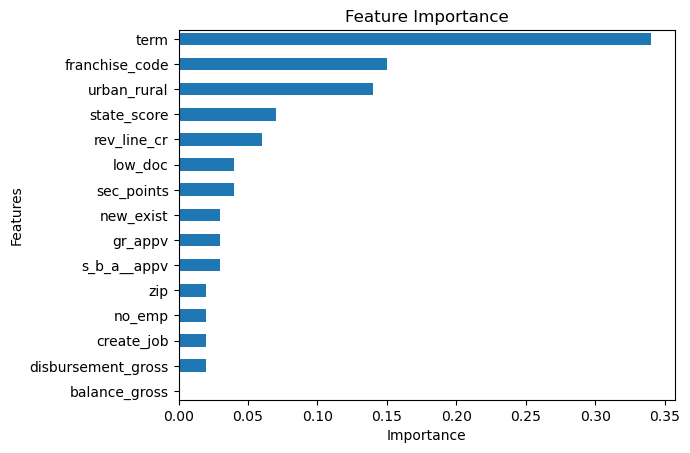

In [71]:
# Create two lists: one for the feature names and one for the importance scores
feat_names = [feat[0] for feat in feat_imp_dict][::-1]
feat_scores = [feat[1] for feat in feat_imp_dict][::-1]

# Set the width of each bar and the spacing between bars
bar_height = 0.5
bar_spacing = 0.1

# Plot the feature importances using Matplotlib
plt.barh(feat_names, feat_scores, height=bar_height, align='center')

# Add labels and title
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')

# Set the y-axis limits to include some extra space on either end
plt.ylim(-0.5 * bar_height - bar_spacing, len(feat_names) - 1 + 0.5 * bar_height + bar_spacing)

# Display the chart
plt.show()
